In [1]:
%matplotlib notebook

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from lib import filedb
#import data.bio_film_data.strainmap as strainmap

In [2]:
ls ../../datasets/LSM780_10x_sigb/

bg_values_redux.json          filedb.tsv
bg_values_redux.tsv           image_locations.json
bgsubex72_neoerodesummary.h5  old/
data_redux_distmap.h5         tenx_filedb_redux.tsv


In [5]:
file_df = filedb.get_filedb("../../datasets/LSM780_10x_sigb/tenx_filedb_redux.tsv")

In [6]:
strain_map, des_strain_map = strainmap.load()

In [8]:
gradient_newsub_df = pd.read_hdf("../../datasets/LSM780_10x_sigb/data_redux_distmap.h5", "data")
gradient_oldsub_df = pd.read_hdf("../../datasets/LSM780_10x_sigb/bgsubex72_neoerodesummary.h5", "data")

In [9]:
def make_ratio_cols(df, top, bot):
    new_label = top.replace("red_", "").replace("green_", "").replace("_red", "").replace("_green", "")
    df["ratio_" + new_label ] = df[top/bot]
    return df

In [16]:
list_of_ratios = [ 
  (gradient_newsub_df, '{0}_bg_mean', 'green', 'red'), 
  (gradient_newsub_df, '{0}_bg_af_mean',  'green', 'red'), 
  (gradient_newsub_df, '{0}_raw_mean',  'green', 'red'), 
  (gradient_oldsub_df, '{0}_bg_mean', 'green', 'red'), 
  (gradient_oldsub_df, '{0}_bgautofluor_mean',  'green', 'red'), 
  (gradient_oldsub_df, '{0}_raw_mean',  'green', 'red')]


In [17]:
for df, pattern, top, bot in list_of_ratios:
    new_label = pattern.format("ratio") 
    ttop = pattern.format(top)
    bbot = pattern.format(bot)
    df[new_label] = df[ttop]/df[bbot]

In [23]:
gradient_newsub_df.columns

Index(['cdist', 'file_id', 'green_bg_af_bt_mean', 'green_bg_af_bt_std',
       'green_bg_af_mean', 'green_bg_af_std', 'green_bg_mean', 'green_bg_std',
       'green_raw_mean', 'green_raw_std', 'pixels', 'red_bg_af_mean',
       'red_bg_af_std', 'red_bg_mean', 'red_bg_std', 'red_raw_mean',
       'red_raw_std', 'ratio_bg_mean', 'ratio_bg_af_mean', 'ratio_raw_mean'],
      dtype='object')

In [110]:
#gradient_nbgsub_df.file_id.unique()

In [18]:
gradient_oldsub_df.columns

Index(['cdist', 'file_id', 'green_bg_mean', 'green_bg_std',
       'green_bgautobleed_mean', 'green_bgautobleed_std',
       'green_bgautofluor_mean', 'green_bgautofluor_std', 'green_raw_mean',
       'green_raw_std', 'pixels', 'red_bg_mean', 'red_bg_std',
       'red_bgautofluor_mean', 'red_bgautofluor_std', 'red_raw_mean',
       'red_raw_std', 'ratio_bg_mean', 'ratio_bgautofluor_mean',
       'ratio_raw_mean'],
      dtype='object')

In [112]:
#gradient_nbgsub_df

In [19]:
def get_strain_time_loc(fdf, df, time, location, strain ):
    fids = file_df[(fdf["time"] == time) &
                   (fdf["location"] == location) &
                   (fdf["strain"] == strain)].index
    #print(fids)
    xdf = df[df["file_id"].isin(fids)]
    return xdf

#### Lets just look at what we know first the 48 hours gradient. 

In [21]:
time = 48.0
location = "center"
strain = "wt_sigar_sigby"

<IPython.core.display.Javascript object>


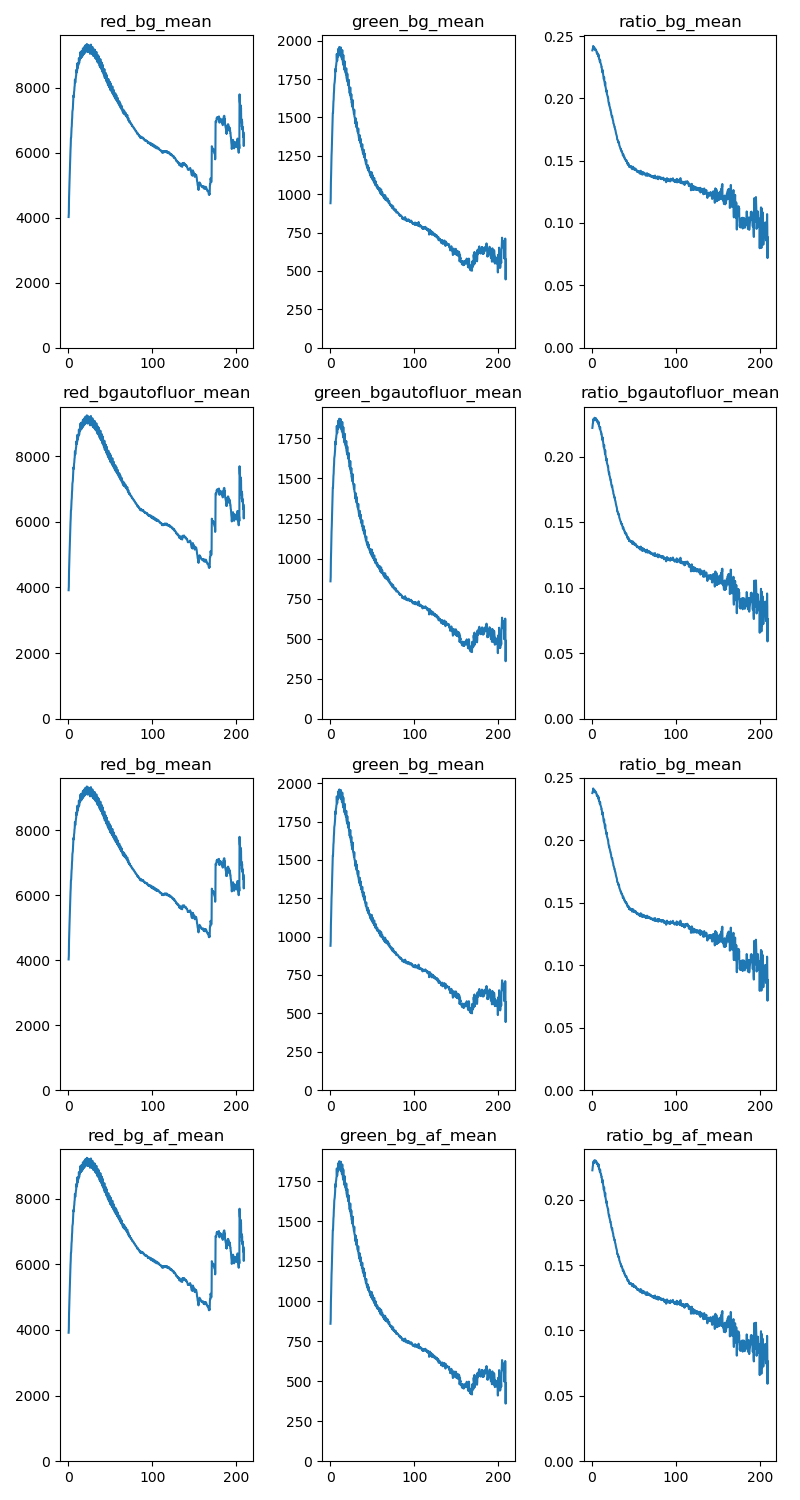

In [24]:
cols = [("red"), ("green"), ("ratio")]
rows = [ (gradient_oldsub_df, "{0}_bg_mean"), (gradient_oldsub_df, "{0}_bgautofluor_mean"), (gradient_newsub_df, "{0}_bg_mean"), (gradient_newsub_df, "{0}_bg_af_mean")]

fig, ax = plt.subplots(len(rows), len(cols))
for r, (df, colname) in enumerate(rows):
    #print(df.file_id.unique())
    look_df = get_strain_time_loc(file_df, df, time, location, des_strain_map[strain])
    for c, color in enumerate(cols):
        df_mean = look_df.groupby("cdist").mean()
        ax[r,c].plot(df_mean.index, df_mean[colname.format(color)])
        ax[r,c].set_title(colname.format(color))
        ax[r,c].set_ylim(bottom=0)
fig.set_size_inches(8,15)
fig.tight_layout()

<IPython.core.display.Javascript object>


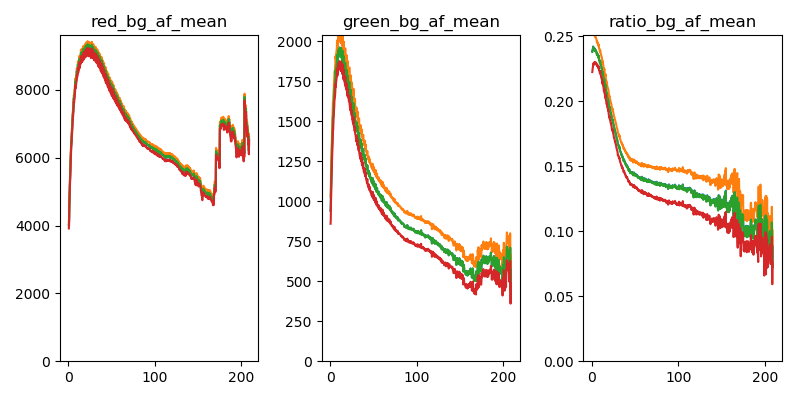

In [25]:
cols = [("red"), ("green"), ("ratio")]
rows = [ (gradient_oldsub_df, "{0}_bg_mean"), (gradient_newsub_df, "{0}_raw_mean"), (gradient_newsub_df, "{0}_bg_mean"), (gradient_newsub_df, "{0}_bg_af_mean")]

fig, ax = plt.subplots(1,len(cols))
for r, (df, colname) in enumerate(rows):
    #print(df.file_id.unique())
    look_df = get_strain_time_loc(file_df, df, time, location, des_strain_map[strain])
    for c, color in enumerate(cols):
        df_mean = look_df.groupby("cdist").mean()
        ax[c].plot(df_mean.index, df_mean[colname.format(color)])
        ax[c].set_title(colname.format(color))
        ax[c].set_ylim(bottom=0)
fig.set_size_inches(8,4)
fig.tight_layout()